Titanik dataset
Проведём полный EDA о пассажирах Титаника:
* Общая структура данных
* Анализ пропущенных значений
* Анализ числовых и категориальных признаков
* Корелляции и зависимости
* Визуализация: распределения, скрипичные диаграммы, тепловая карта
* Предварительные гипотезы

In [5]:
import matplotlib.pyplot as plt
from numpy.f2py.cb_rules import cb_map
from ydata_profiling.utils.information import title
# Одно из двух
#! conda install ydata-profilling --y
! pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# Одно из двух
#! conda install sweetviz --y
! pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Одно из двух
#! conda install dtale --y
!pip install dtale

Defaulting to user installation because normal site-packages is not writeable


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Расширенные библиотеки
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import folium

# AutoEDA
from ydata_profiling import ProfileReport
import sweetviz as sv
import dtale

#Для отображения
import warnings
warnings.filterwarnings("ignore")


In [13]:
titanik = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanik.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

2. Общая  информация и структура

In [14]:
titanik.info()
titanik.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

3. Пропущенные значения

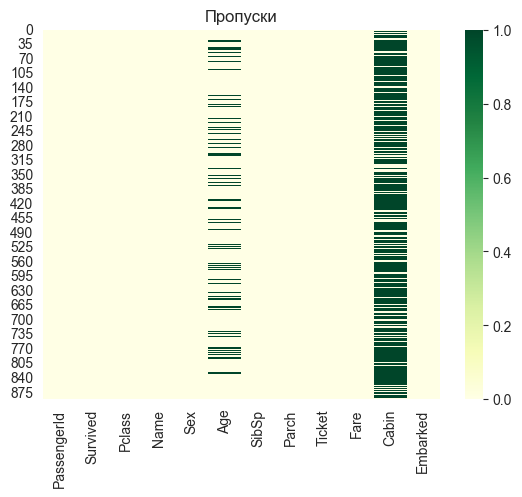

In [15]:
titanik.isnull().sum()
sns.heatmap(titanik.isnull(), cbar=True, cmap="YlGn")
plt.title("Пропуски")
plt.show()

4. Выживаемость и пол

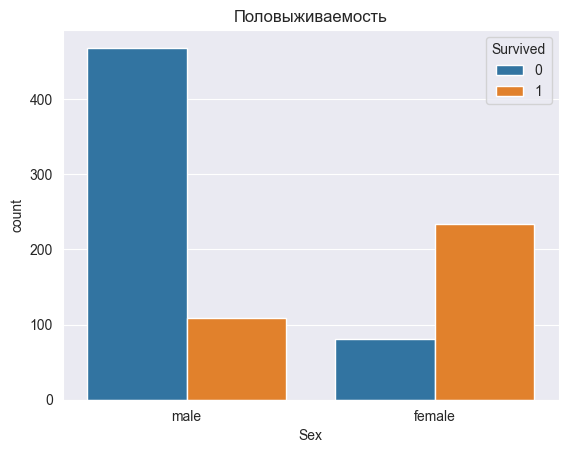

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815

In [16]:
sns.countplot(x="Sex", data=titanik, hue="Survived")
plt.title("Половыживаемость")
plt.show()

pd.crosstab(titanik["Sex"], titanik["Survived"],normalize='index') * 100

KeyError: 'female'

6. Выживание по возрасту

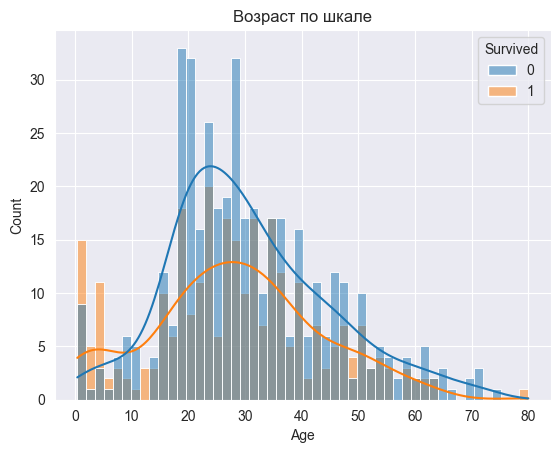

In [17]:
sns.histplot(data=titanik,x="Age", hue= "Survived",bins=50, kde=True)
plt.title("Возраст по шкале")
plt.show()

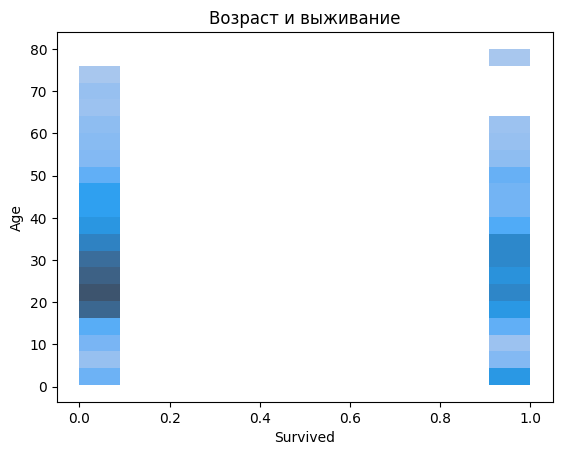

In [41]:
sns.histplot(data=titanik, x="Survived", y="Age")
plt.title("Возраст и выживание")
plt.show()

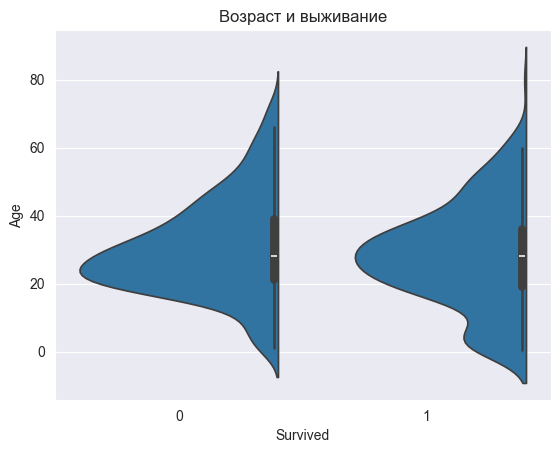

In [18]:
sns.violinplot(data=titanik, x="Survived", y="Age", split=True)
plt.title("Возраст и выживание")
plt.show()

7. Семьи на борту

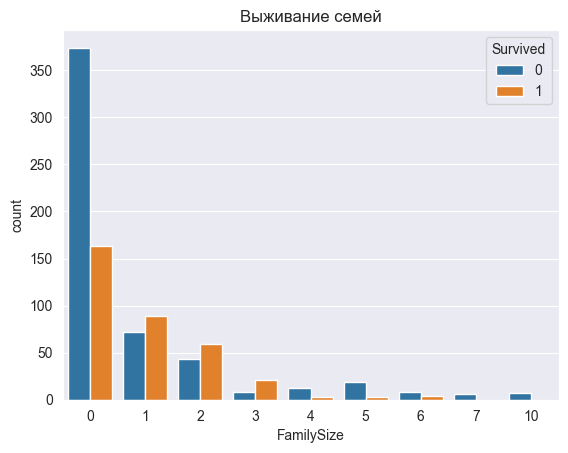

In [19]:
titanik["FamilySize"] = titanik["SibSp"] + titanik["Parch"]
sns.countplot(data=titanik, x="FamilySize", hue="Survived")
plt.title("Выживание семей")
plt.show()

8. Стоимость билета

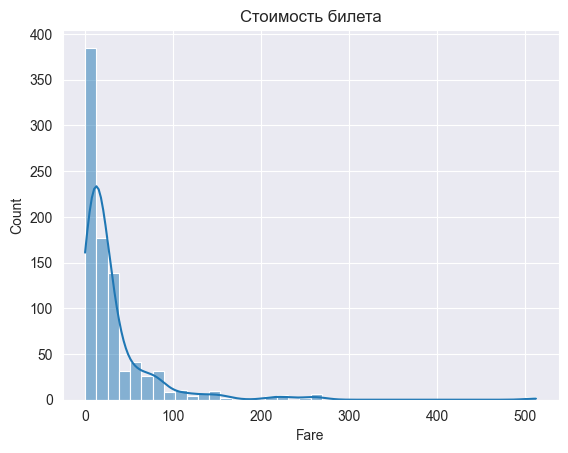

In [20]:
sns.histplot(titanik["Fare"], bins=40, kde=True)
plt.title("Стоимость билета")
plt.show()

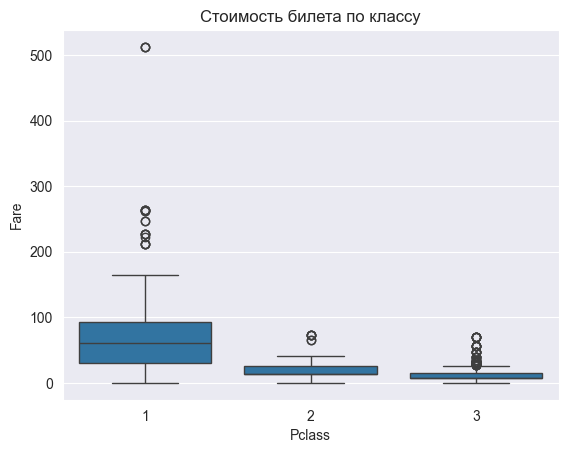

In [21]:
sns.boxplot(data=titanik, x="Pclass", y="Fare")
plt.title("Стоимость билета по классу")
plt.show()

9. Корреляции и тепловая карта

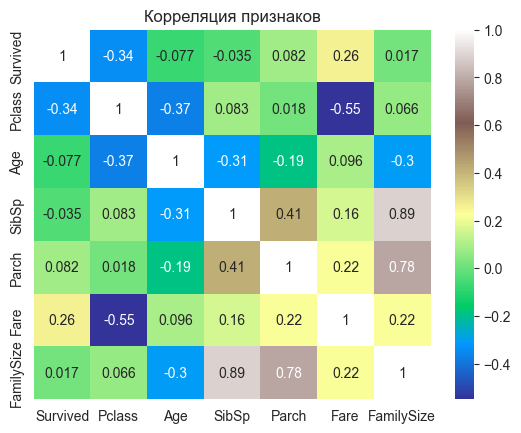

In [77]:
corr = titanik[["Survived","Pclass", "Age", "SibSp", "Parch", "Fare", "FamilySize"]].corr()
sns.heatmap(corr, annot=True, cmap="terrain")
plt.title("Корреляция признаков")
plt.show()

10. Порт посадки

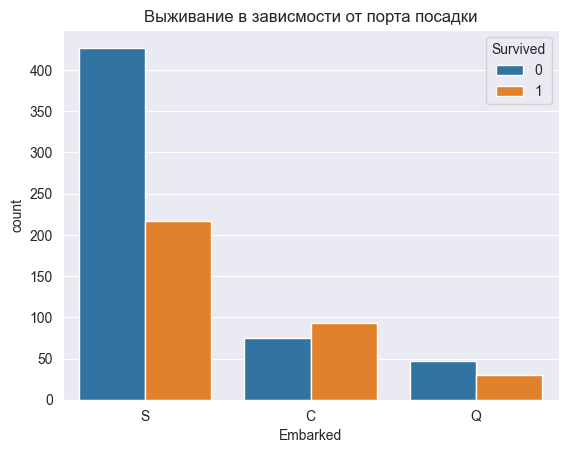

In [79]:
sns.countplot(data=titanik, x="Embarked", hue="Survived")
plt.title("Выживание в зависмости от порта посадки")
plt.show()

11. Интерактив: возраст и стоимость билета

In [83]:
fig = px.scatter(titanik, x="Age", y="Fare", color="Survived", hover_data=["Sex", "Pclass"])
fig.update_layout(title="Возраст vs Цена билета (цвет = выживание)")
fig.show()

12. Выводы
Женщины и пассажиры 1 класса выживали чаще.
Большие семьи реже выживали.
Чем выше цена билета — тем выше шанс на выживание.
Возраст также влиял: дети выживали чаще.
EDA показывает важные признаки, влияющие на выживание, и может быть использован для обучения моделей машинного обучения.



13. AutoEDA: YData Profiling и Sweetviz

In [85]:
# YData Profiling
profile = ProfileReport(titanik, title="Отчёт о выборке -Титаник-", explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Feature: PassengerId                         |▋         | [  7%]   00:00 -> (00:00 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

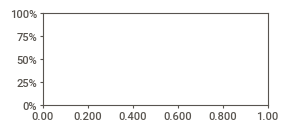

In [91]:
# Sweetviz
report = sv.analyze(titanik)
report.show_html("sweetviz_titanik.html")

In [92]:
# D-Tale запуск (лучше в веб)
dtale.show(titanik)

Bonus Part


Датасет 2: Airbnb NYC + Гео-визуализация

In [96]:
airbnb = pd.read_csv("Airbnb_Open_Data.csv")

# Приведём цену к числовому формату, если нужно
airbnb = airbnb[airbnb["price"] < "$500"]  # фильтрация выбросов
airbnb = airbnb.dropna(subset=["lat", "long"])

airbnb[["NAME", "neighbourhood group", "lat", "long", "price"]].sample(5)

FileNotFoundError: [Errno 2] No such file or directory: 'Airbnb_Open_Data.csv'

In [97]:
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
for _, row in airbnb.sample(200).iterrows():
    folium.CircleMarker([row["lat"], row["long"]], radius=3,
                        popup=f"{row['price']}", color="blue").add_to(m)

NameError: name 'airbnb' is not defined

Датасет 3: World Hapiness Report (Геокарта + тепловая карта)

In [104]:
happiness = pd.read_csv("2015.csv", delimiter=';')

# Берём последний год (2023 или 2024)
last_year = happiness["Year"].max()
h = happiness[happiness["Year"] == last_year]

fig = px.choropleth(
    h,
    locations="Country",
    locationmode="country names",
    color="Healthy life expectancy",
    hover_name="Country",
    title=f"World Happiness ({last_year})"
)
fig.show()

KeyError: 'Year'